# **BCAST IDS LITE version**: Isolation Forest algorithm


# Importing the libraries

In [161]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import IsolationForest
import numpy as np
import pandas as pd
%matplotlib inline

## Upload the dataset


Upload a dataset from your system:


In [ ]:
from google.colab import files
uploaded = files.upload()

In [162]:
name_columns = ['MAC', 'NUM_MACS', 'UCAST', 'MCAST', 'BCAST','ARPrq','ARPpb','ARPan','ARPgr','IPF','IP_ICMP','IP_UDP','IP_TCP','IP_RESTO','IP6','ETH_RESTO','ARP_noIP','SSDP','ICMPv6']
df = pd.read_csv('dataset.csv',sep=';',names=name_columns)
df = df.fillna(0)
to_model_columns=df.columns[1:19]
df[to_model_columns] = df[to_model_columns].astype(int)
df_noMAC = df.drop(['MAC'] , axis=1)
df.head()

,MAC,NUM_MACS,UCAST,MCAST,BCAST,ARPrq,ARPpb,ARPan,ARPgr,IPF,IP_ICMP,IP_UDP,IP_TCP,IP_RESTO,IP6,ETH_RESTO,ARP_noIP,SSDP,ICMPv6
0,d47bb0105975,255,0,2,253,253,0,0,0,2,0,0,0,1,1,0,251,0,1
1,80e650144cda,4,0,4,0,0,0,0,0,0,0,1,0,1,2,0,0,0,1
2,60fec5cb77a1,2,0,2,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
3,d47bb0105975,261,0,4,257,257,0,0,0,2,0,0,0,1,3,0,251,0,3
4,80e650144cda,2,0,2,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1


## Visualize the dataset

### Plot
Reduce the entire dataset to 3 dimensions using the PCA algorithm in order to visualize the points:

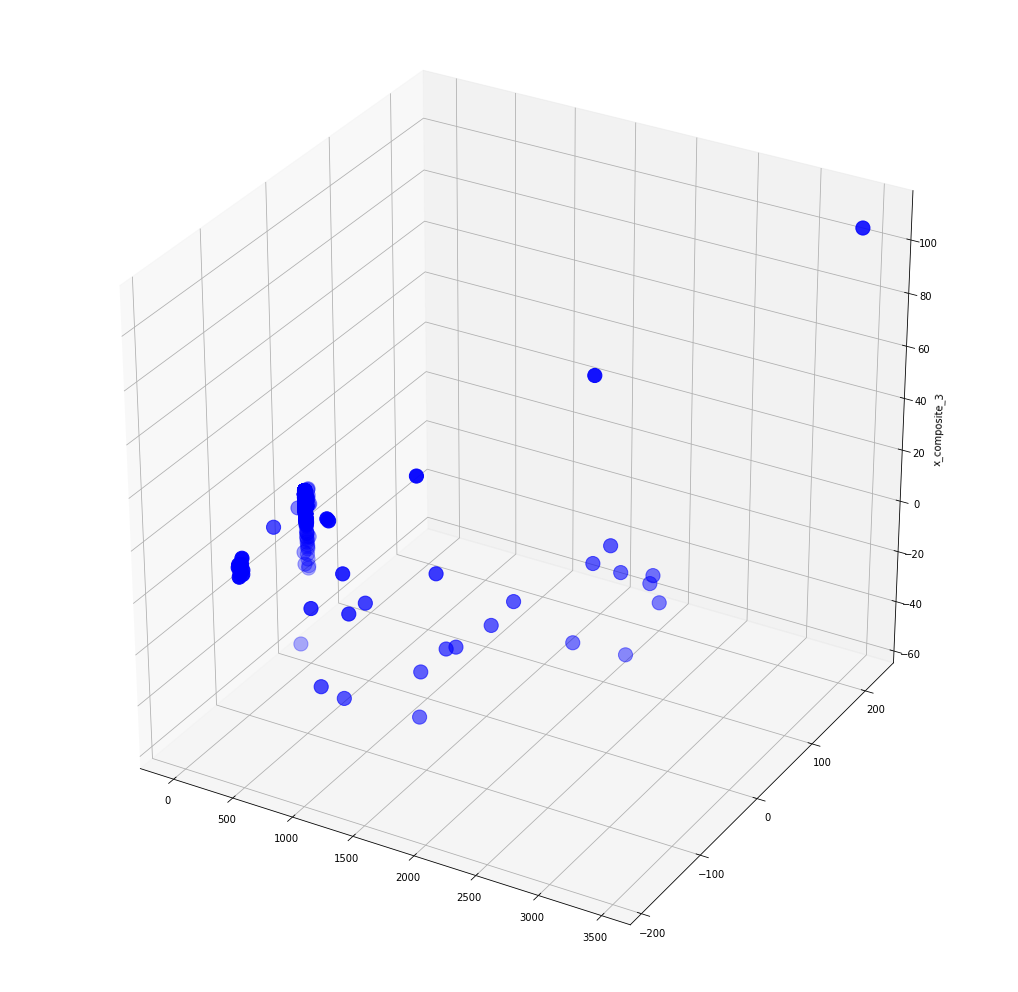

In [163]:
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(df_noMAC)
X_reduce = pca.fit_transform(df_noMAC)

fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")

# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=200, lw=1, label="inliers",c="blue")

### More visualizations

In [ ]:
df_noMAC.describe()

In [ ]:
df_noMAC.corr()

In [ ]:
df_noMAC.hist()
plt.show()

## Isolation Forest algorithm to identify anomalies
Isolation Forest is a kind of **unsupervised learning**, which consist of a type of machine learning that looks for previously undetected patterns in a data set with no pre-existing labels and with a minimum of human supervision.

In particular, Isolation Forest explicitly identifies anomalies instead of profiling normal data points. This algorithm is built on the basis of decision trees. In these trees, partitions are created by first randomly selecting a feature and then selecting a random split value between the minimum and maximum value of the selected feature.

In principle, outliers are less frequent than regular observations and are different from them in terms of values (they lie further away from the regular observations in the feature space). The main idea is represented above: an abnormal point (on the left) requires less partitions to be identified than an normal point (right):

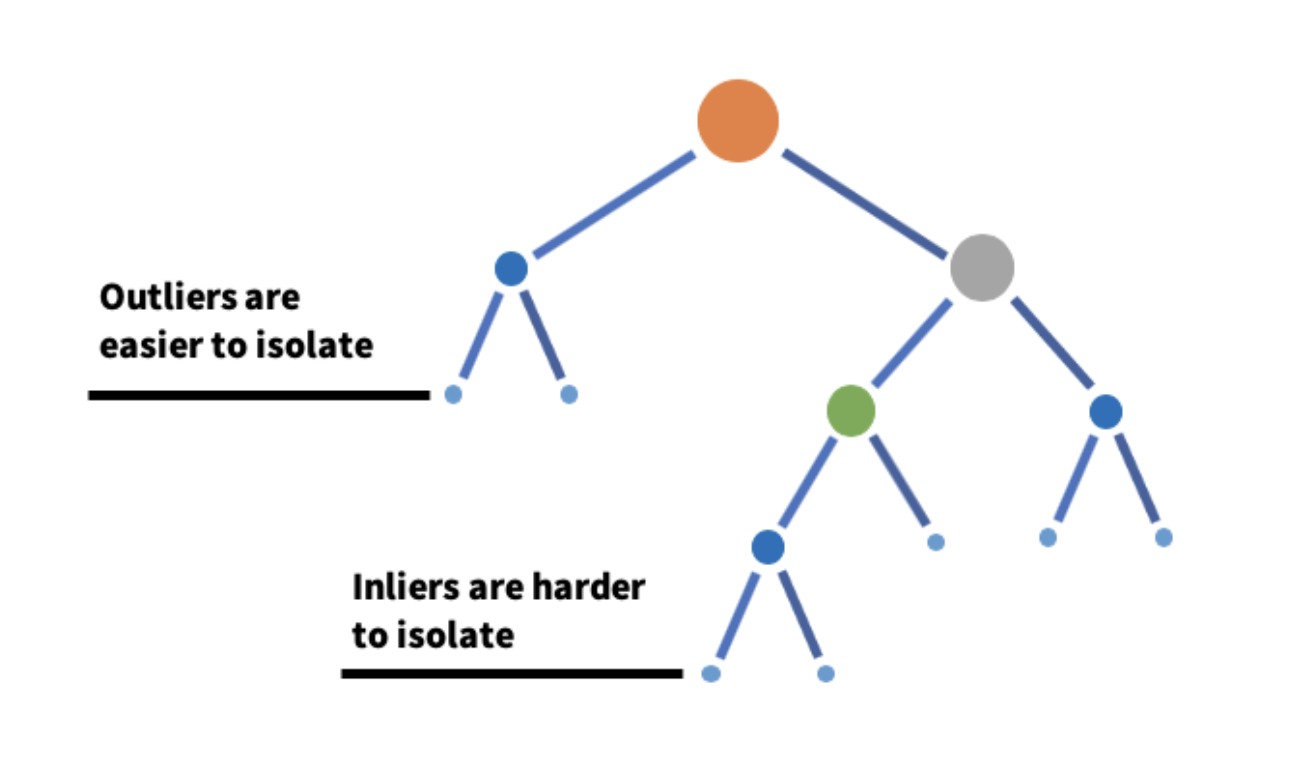

### Trainning phase
The contamination parameter specifies the percentage of observations we believe to be outliers. 

*   If ‘auto’, the threshold is determined as in the original paper.
*   If float, the contamination should be in the range [0, 0.5].



In [172]:
classifier = IsolationForest(bootstrap=False, contamination=0.013, max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=None, random_state=42, warm_start=False)
pred = classifier.fit_predict(df_noMAC[to_model_columns])

### Results

In [178]:
df_noMAC['ANOMALY']=pred
outliers = df_noMAC.loc[df_noMAC['ANOMALY']==-1]

# Show the normal and abnormal points
print("RESULTS: (1 normal activity / -1 abnormal activity)")
df_noMAC['ANOMALY']=pred
print(df_noMAC['ANOMALY'].value_counts())
print()

# Show the outliers captured:
print("Outliers captured: ")
outlier_index=list(outliers.index)
df.iloc[outlier_index].head(df_noMAC['ANOMALY'].value_counts()[-1])

RESULTS: (1 normal activity / -1 abnormal activity)
 1    1764
-1      24
Name: ANOMALY, dtype: int64

Outliers captured: 


,MAC,NUM_MACS,UCAST,MCAST,BCAST,ARPrq,ARPpb,ARPan,ARPgr,IPF,IP_ICMP,IP_UDP,IP_TCP,IP_RESTO,IP6,ETH_RESTO,ARP_noIP,SSDP,ICMPv6
25,d47bb0105975,1261,0,3,1258,1258,0,0,0,3,0,0,0,0,3,0,251,0,3
67,c0eefb5d7fc7,1496,0,71,1425,1425,0,0,0,1,0,48,0,1,22,0,248,2,16
76,c0eefb5d7fc7,1372,0,56,1316,1316,0,0,0,1,0,44,0,1,11,0,248,1,7
78,c0eefb5d7fc7,1054,0,50,1004,1004,0,0,0,1,0,32,0,3,15,0,246,3,10
81,c0eefb5d7fc7,1240,0,68,1172,1172,0,0,0,0,0,51,0,3,14,0,247,3,8
85,c0eefb5d7fc7,1402,0,78,1324,1324,0,0,0,1,0,62,0,2,14,0,247,3,9
89,c0eefb5d7fc7,487,0,44,443,443,0,0,0,0,0,33,0,6,5,0,240,2,1
93,c0eefb5d7fc7,1337,0,49,1288,1288,0,0,0,1,0,33,0,3,13,0,248,1,10
96,c0eefb5d7fc7,989,0,52,937,937,0,0,0,0,0,38,0,3,11,0,245,3,7
100,c0eefb5d7fc7,793,0,65,728,728,0,0,0,1,0,51,0,5,9,0,247,3,4


The outliers d

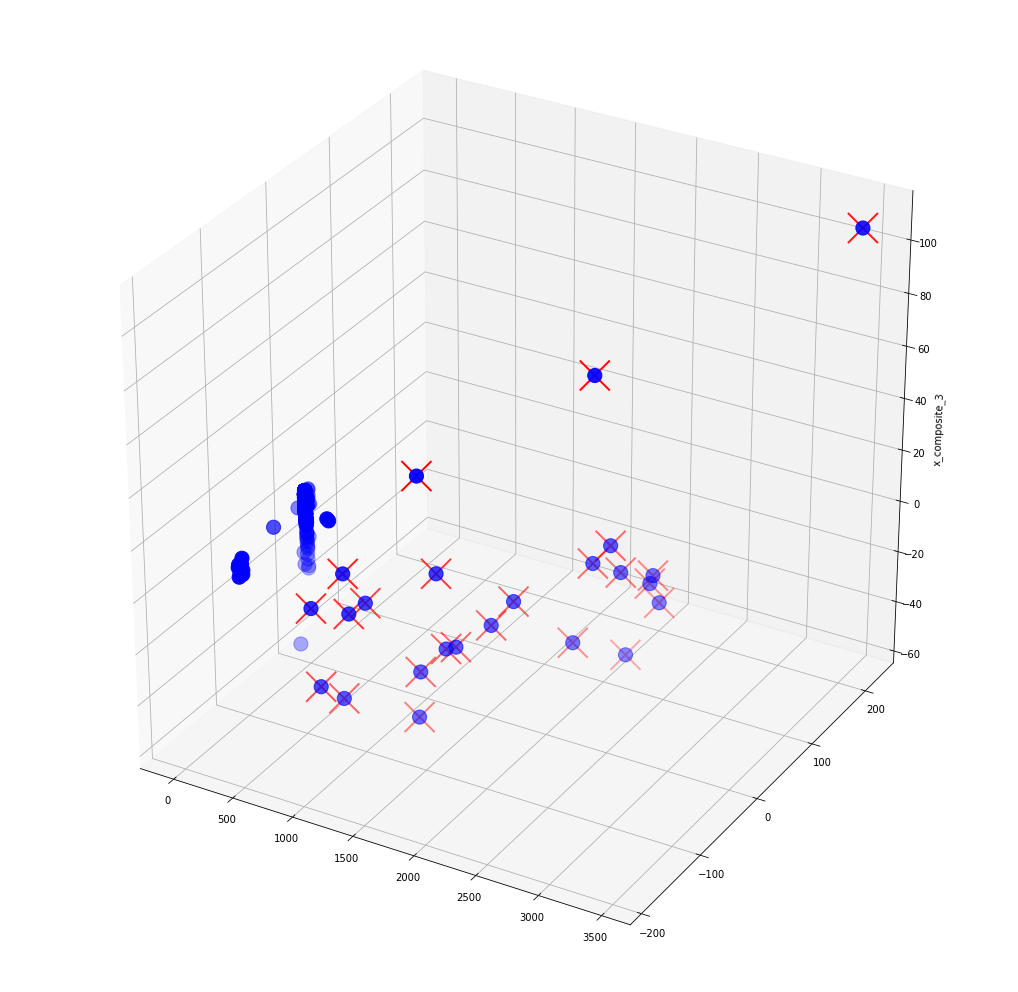

In [174]:
outlier_index=list(outliers.index)
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(df_noMAC)
X_reduce = pca.fit_transform(df_noMAC)

fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")

# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=200, lw=1, label="inliers",c="blue")

# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=900, marker="x", c="red", label="outliers")

# References
1.   https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html
2.   https://towardsdatascience.com/outlier-detection-with-isolation-forest-3d190448d45e
3.   https://www.cienciadedatos.net/documentos/66_deteccion_anomalias_isolationforest.html#introducci%C3%B3n


